# <center>Lecture 05: Neural Networks</center>

## 1. Simple Neural Network Regression Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(124)
num_obs = 100
mean = 0.0
std_dev = 0.1
X = np.random.rand(num_obs) * 2 * np.pi
y = np.sin(X) + np.random.normal(mean, std_dev, num_obs)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [4]:
X = X.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
h = lin_reg.predict(X)
rmse = root_mean_squared_error(y, h)
print(f'Train RMSE = {rmse:.4f}')
h_test = lin_reg.predict(X_test)
rmse = root_mean_squared_error(y_test, h_test)
print(f'Test RMSE = {rmse:.4f}')

Train RMSE = 0.4296
Test RMSE = 0.5024


In [5]:
from sklearn.neural_network import MLPRegressor

In [6]:
nn = MLPRegressor()
nn.fit(X, y)
print(f'n_iter = {nn.n_iter_}')
print(f'number of layers = {nn.n_layers_}')
print(f'coefficient size = {[coef.shape for coef in nn.coefs_]}')
h_nn = nn.predict(X)
rmse = root_mean_squared_error(y, h_nn)
print(f'Train RMSE = {rmse:.4f}')
h_nn_test = nn.predict(X_test)
rmse = root_mean_squared_error(y_test, h_nn_test)
print(f'Test RMSE = {rmse:.4f}')

n_iter = 200
number of layers = 3
coefficient size = [(1, 100), (100, 1)]
Train RMSE = 0.3381
Test RMSE = 0.4015


c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 2. Scikit-learn Neural Network with GridSearchCV

* Classification: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

* Regression: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

* GridSearchCV: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html

In [126]:
activations = ['tanh', 'logistic', 'relu']
for activation in activations:
    nn = MLPRegressor(max_iter = 200000, activation=activation, solver = 'adam', 
                      learning_rate_init = 0.01, learning_rate = 'constant')
    nn.fit(X, y)
    print(f'activation = {activation}')
    print(f'n_iter = {nn.n_iter_}')
    print(f'number of layers = {nn.n_layers_}')
    print(f'coefficient size = {[coef.shape for coef in nn.coefs_]}')
    print(f'Train RMSE = {root_mean_squared_error(y, nn.predict(X)):.4f}')
    print(f'Test RMSE = {root_mean_squared_error(y_test, nn.predict(X_test)):.4f}')
    print(f'---------')    

activation = tanh
n_iter = 21
number of layers = 3
coefficient size = [(1, 100), (100, 1)]
Train RMSE = 0.4377
Test RMSE = 0.5370
---------
activation = logistic
n_iter = 46
number of layers = 3
coefficient size = [(1, 100), (100, 1)]
Train RMSE = 0.4272
Test RMSE = 0.5208
---------
activation = relu
n_iter = 235
number of layers = 3
coefficient size = [(1, 100), (100, 1)]
Train RMSE = 0.1074
Test RMSE = 0.1239
---------


In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
nn_param = {'activation': ['tanh','logistic','relu'], 'hidden_layer_sizes':[(50,),(100,),(1000,),(200,100),(100,100)]}
nn = MLPRegressor(max_iter=200000, solver='adam',
                      learning_rate_init = 0.01, learning_rate = 'constant')
nn_cv = GridSearchCV(nn, nn_param, cv=5, verbose=1)
nn_cv.fit(X,y)
nn_cv.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'activation': 'relu', 'hidden_layer_sizes': (100, 100)}

In [9]:
nn = nn_cv.best_estimator_
print(f'n_iter = {nn.n_iter_}')
print(f'number of layers = {nn.n_layers_}')
print(f'coefficient size = {[coef.shape for coef in nn.coefs_]}')
y_pred = nn.predict(X)
rmse = root_mean_squared_error(y, y_pred)
print(f'Train RMSE = {rmse:.4f}')
y_pred_test = nn.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
print(f'Test RMSE = {rmse:.4f}')

n_iter = 121
number of layers = 4
coefficient size = [(1, 100), (100, 100), (100, 1)]
Train RMSE = 0.0935
Test RMSE = 0.1000


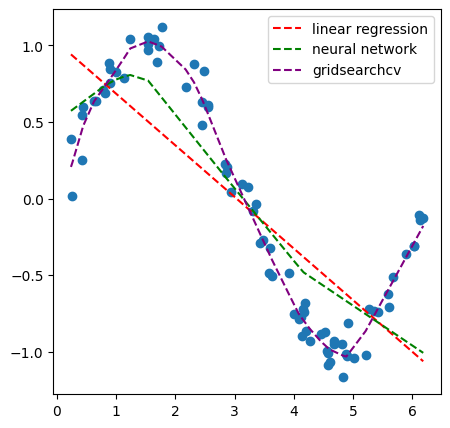

linear regression,rmse=0.4296
neural network,rmse=0.3381
gridsearchcv,rmse=0.0935


In [ ]:
X = X.flatten()
sort_indices = np.argsort(X)
X = X[sort_indices]
y = y[sort_indices]
h = h.flatten()[sort_indices]
h_nn = h_nn.flatten()[sort_indices]
y_pred = y_pred.flatten()[sort_indices]
plt.figure(figsize=(5, 5))
plt.scatter(X, y)
plt.plot(X, h, color='red', linestyle='--',label='linear regression')
plt.plot(X, h_nn, color='green', linestyle='--', label='neural network')
plt.plot(X, y_pred, color='purple', linestyle='--', label='gridsearchcv')
plt.legend()
plt.show()
for p,m in zip([h, h_nn, y_pred],['linear regression','neural network','gridsearchcv']):
    rmse = root_mean_squared_error(y, p)
    print(f'{m},rmse={rmse:.4f}')